In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
arquivo = 'E:\Dados_do_power_BI\cap_08\dado.csv'.replace("\\","/")

In [3]:
df = pd.read_csv(arquivo, encoding = 'utf-8')

In [4]:
display(df)

,ID-Venda,Data,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País
0,1093,2/3/2020,DX101,GF54592,15.56,9.34,Belo Horizonte,Minas Gerais,Brasil
1,1102,23/03/2020,DX101,GF54599,16.98,8.64,Taubaté,São Paulo,Brasil
2,1027,27/02/2020,CX102,GF54233,24.79,11.40,Belo Horizonte,Minas Gerais,Brasil
3,1048,3/3/2020,CX102,GF54664,25.98,12.89,Linhares,Espírito Santo,Brasil
4,1066,5/3/2020,CX102,GF54402,26.90,13.39,Petrópolis,Rio de Janeiro,Brasil
...,...,...,...,...,...,...,...,...,...
101,1080,4/3/2020,BX103,GF54291,75.03,33.09,São Paulo,São Paulo,Brasil
102,1091,22/03/2020,BX103,GF54648,75.04,34.47,Campos,Rio de Janeiro,Brasil
103,1092,27/03/2020,BX103,GF54624,76.05,32.40,Belo Horizonte,Minas Gerais,Brasil
104,1096,27/03/2020,BX103,GF54642,77.90,35.16,São Paulo,São Paulo,Brasil


##### perguntas a serem respondidas

- Total monetário de vendas por dia
- Total monetário de vendas por cidade
- Média de valor monetário de vendas por estado
- Média de valor monetário de vendas por produto
- Total de unidades vendidas por estado e por dia
- Total de unidades vendidas por produto

#### Análise exploratória e limpeza dos dados

Dicionário de variáveis


- ID-Venda: Identificação da venda
- Data: data de ocorrência da venda
- Produto: Código de identificação do produto
- Número_Serial: Número de série da venda
- Valor_Venda: Valor nominal da venda
- Preço_Custo: Preço de custo do produto
- Cidade: Cidade onde a venda ocorreu
- Estado: Estado de ocorrencia da venda
- País: Pais onde a venda ocorreu

In [5]:
df.dtypes

ID-Venda           int64
Data              object
Produto           object
Número_Serial     object
Valor_Venda      float64
Preço_Custo      float64
Cidade            object
Estado            object
País              object
dtype: object

In [6]:
# Convertendo a coluna ID-Venda para textos
df['ID-Venda'] = df['ID-Venda'].astype(str)

In [7]:
#separar as coordenadas de datas para facilitar as analises
df[['Dia', 'Mês', 'Ano']] = df['Data'].str.split('/', expand=True)
df = df.drop(['Data'], axis = 1)
#######
df['Dia'] = df['Dia'].astype(int)
df['Mês'] = df['Mês'].astype(int)
df['Ano'] = df['Ano'].astype(int)
#######
df['Dia'] = df['Dia'].astype(str)
df['Mês'] = df['Mês'].astype(str)
df['Ano'] = df['Ano'].astype(str)

In [8]:
display(df)

,ID-Venda,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País,Dia,Mês,Ano
0,1093,DX101,GF54592,15.56,9.34,Belo Horizonte,Minas Gerais,Brasil,2,3,2020
1,1102,DX101,GF54599,16.98,8.64,Taubaté,São Paulo,Brasil,23,3,2020
2,1027,CX102,GF54233,24.79,11.40,Belo Horizonte,Minas Gerais,Brasil,27,2,2020
3,1048,CX102,GF54664,25.98,12.89,Linhares,Espírito Santo,Brasil,3,3,2020
4,1066,CX102,GF54402,26.90,13.39,Petrópolis,Rio de Janeiro,Brasil,5,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
101,1080,BX103,GF54291,75.03,33.09,São Paulo,São Paulo,Brasil,4,3,2020
102,1091,BX103,GF54648,75.04,34.47,Campos,Rio de Janeiro,Brasil,22,3,2020
103,1092,BX103,GF54624,76.05,32.40,Belo Horizonte,Minas Gerais,Brasil,27,3,2020
104,1096,BX103,GF54642,77.90,35.16,São Paulo,São Paulo,Brasil,27,3,2020


In [9]:
print(len(df['ID-Venda'].unique()))
print(len(df['Produto'].unique()))
print(df['Produto'].unique())

106
12
['DX101' 'CX102' 'BX101' 'AX103' 'BX102' 'DX103' 'CX101' 'AX102' 'DX102'
 'BX103' 'CX103' 'AX101']


In [10]:
df[df['Produto'] == 'BX101']

,ID-Venda,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País,Dia,Mês,Ano
6,1004,BX101,GF54527,30.06,13.53,Rio de Janeiro,Rio de Janeiro,Brasil,28,3,2020
7,1039,BX101,GF54692,29.40,14.73,Vila Velha,Espírito Santo,Brasil,17,3,2020
8,1040,BX101,GF54696,28.98,14.73,Vila Velha,Espírito Santo,Brasil,4,3,2020
28,1046,BX101,GF54607,27.65,14.73,Linhares,Espírito Santo,Brasil,4,3,2020
29,1064,BX101,GF54434,26.90,14.73,Petrópolis,Rio de Janeiro,Brasil,11,3,2020
30,1070,BX101,GF54460,33.90,15.03,Belo Horizonte,Minas Gerais,Brasil,20,3,2020
31,1072,BX101,GF54433,34.23,14.73,São Paulo,São Paulo,Brasil,30,3,2020


In [11]:
print(df['Ano'].unique())
#existe um ano estranho na coluna ano, pode ser que isso seja um erro, vou corrigir isso para 2020

['2020' '20201']


In [12]:
df[df['Ano'] == '20201']

,ID-Venda,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País,Dia,Mês,Ano
18,1031,DX101,GF54489,18.56,8.11,Belo Horizonte,Minas Gerais,Brasil,18,3,20201


In [13]:
df['Ano'] = df['Ano'].replace("20201", "2020")

In [14]:
for coluna in df.columns:
    print(coluna)
    print()
    print(df[coluna].unique())
    print("$$$$$$$$$$$$$$")

ID-Venda

['1093' '1102' '1027' '1048' '1066' '1094' '1004' '1039' '1040' '1086'
 '1100' '1002' '1006' '1015' '1016' '1036' '1037' '1009' '1031' '1034'
 '1057' '1059' '1062' '1076' '1077' '1085' '1087' '1090' '1046' '1064'
 '1070' '1072' '1014' '1018' '1043' '1044' '1065' '1013' '1019' '1029'
 '1045' '1089' '1008' '1010' '1011' '1025' '1038' '1041' '1053' '1055'
 '1067' '1079' '1098' '1104' '1106' '1007' '1012' '1017' '1023' '1030'
 '1050' '1054' '1071' '1082' '1049' '1061' '1095' '1021' '1024' '1033'
 '1047' '1060' '1063' '1068' '1074' '1083' '1084' '1101' '1103' '1028'
 '1042' '1056' '1058' '1088' '1105' '1001' '1003' '1005' '1020' '1026'
 '1032' '1081' '1099' '1022' '1035' '1051' '1052' '1069' '1073' '1075'
 '1078' '1080' '1091' '1092' '1096' '1097']
$$$$$$$$$$$$$$
Produto

['DX101' 'CX102' 'BX101' 'AX103' 'BX102' 'DX103' 'CX101' 'AX102' 'DX102'
 'BX103' 'CX103' 'AX101']
$$$$$$$$$$$$$$
Número_Serial

['GF54592' 'GF54599' 'GF54233' 'GF54664' 'GF54402' 'GF54679' 'GF54527'
 'GF54692' '

In [15]:
df['Cidade'] = df['Cidade'].astype(str)

In [16]:
df[df['Cidade'] == 'nan']

,ID-Venda,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País,Dia,Mês,Ano
40,1045,CX101,GF54559,44.9,21.75,nan,NaN,Chile,24,3,2020


In [17]:
df = df.drop(40)
df = df.reset_index()
df = df.drop(axis = 1, columns=['index'])

In [18]:
df['Estado'] = df['Estado'].astype(str)

In [19]:
df[df['Estado'] == 'nan']

,ID-Venda,Produto,Número_Serial,Valor_Venda,Preço_Custo,Cidade,Estado,País,Dia,Mês,Ano
16,1037,BX102,GF54448,54.9,28.39,Vitória,nan,Brasil,27,3,2020


In [20]:
df = df.drop(16)
df = df.reset_index()
df = df.drop(axis = 1, columns=['index'])

In [21]:
new_df = df[df['Mês'] == '2']

In [22]:
print(new_df['Dia'].unique())

['27' '28']


In [23]:
new_df2 = df[df['Mês'] == '3']

In [24]:
print(new_df2['Dia'].unique())

['2' '23' '3' '5' '28' '17' '4' '27' '19' '1' '6' '18' '20' '31' '24' '29'
 '22' '11' '30' '7' '21' '14' '16' '13' '25' '15' '8' '10' '9']


In [25]:
df['Dia'] = df['Dia'].astype(int)

##### Total monetário de vendas por dia

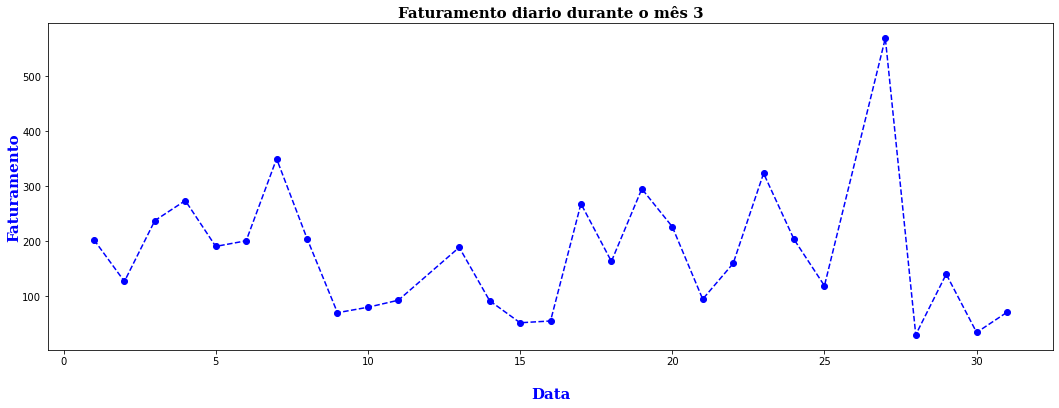

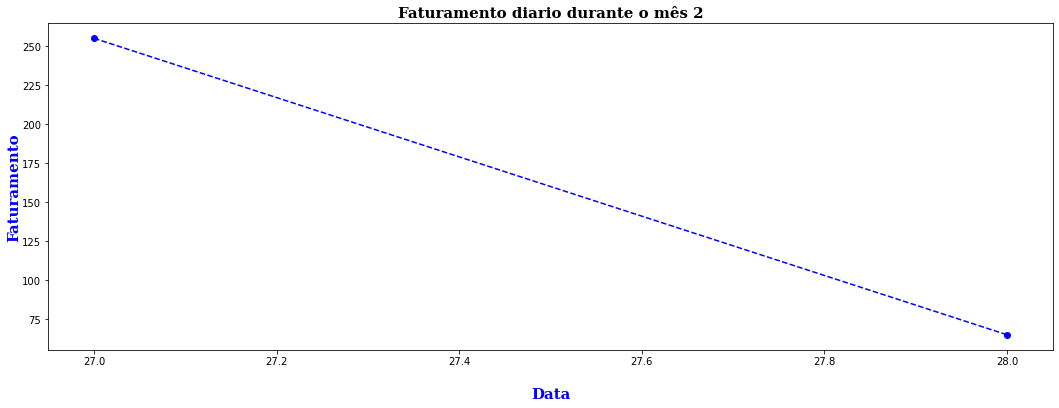

In [26]:
meses = df['Mês'].unique()
for mes in meses:
    new_df = df[df['Mês'] == mes]
    dias = new_df['Dia'].unique()
    dias.sort()
    total_dias = list()
    for dia in dias:
        new_df2 = new_df[new_df['Dia'] == dia]
        value = new_df2['Valor_Venda'].sum()
        total_dias.append(value)
        
    fig, ax = plt.subplots(figsize=(18,6))
    
    plt.plot(dias, total_dias, 'b--', marker = 'o')
    
    plt.title(f"Faturamento diario durante o mês {mes}", fontdict  = {'fontsize': '15',
                                                                                   'family': 'serif',
                                                                                   'fontweight': 'bold',
                                                                                   'color': 'black' }, loc = 'center')
    #configuração e estilos do label x
    plt.xlabel("\nData", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue' }, loc = 'center')
    #configuração e estilos do label y
    plt.ylabel("Faturamento", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue', 'verticalalignment': 'baseline',
                                            }, loc = 'center')
    
    
    plt.show()

#### Total monetário de vendas por cidade

Média= 362.30
Belo Horizonte----953.60
Taubaté----71.21
Linhares----273.65
Petrópolis----258.34
Rio de Janeiro----414.56
Vila Velha----258.82
Uberlândia----98.57
Campos----319.95
São Paulo----1772.50
Osasco----96.62
Vitória----359.47
Campinas----97.19
Betim----131.32
Teresópolis----274.63
Santos----54.12



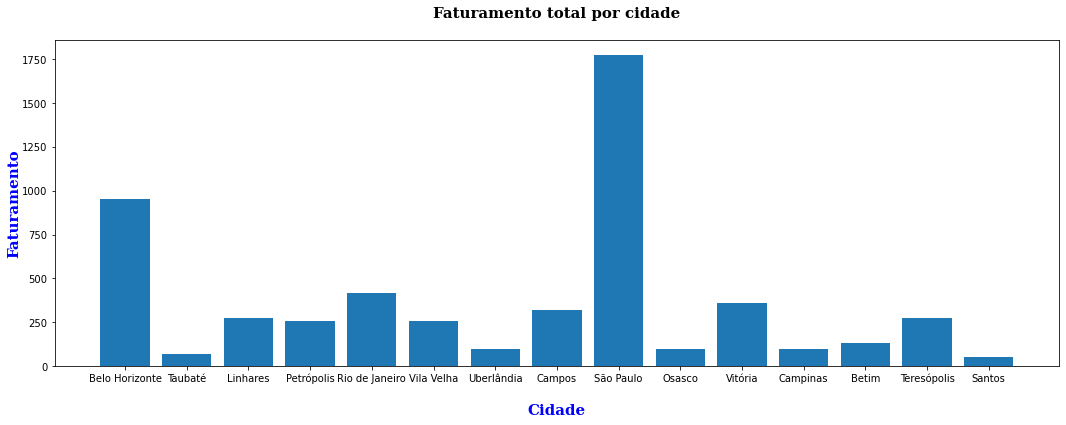

In [27]:
cidades = df['Cidade'].unique()
media = df['Valor_Venda'].sum()/len(df['Cidade'].unique())
print(f"Média= {media:.2f}")
total_cidades = list()
for cidade in cidades:
    new_df = df[df['Cidade'] == cidade]
    total_cidade = new_df['Valor_Venda'].sum()
    total_cidades.append(total_cidade)
    print(f"{cidade}----{total_cidade:.2f}")
print()
fig, ax = plt.subplots(figsize=(18,6))

plt.bar(cidades, total_cidades)

#configuração e estilos do titulo
plt.title(f"Faturamento total por cidade\n", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nCidade", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Faturamento", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()

#### Média de valor monetário de vendas por estado

Média: 1358.6374999999998
Minas Gerais----1183.49
São Paulo----2091.64
Espírito Santo----891.94
Rio de Janeiro----1267.48



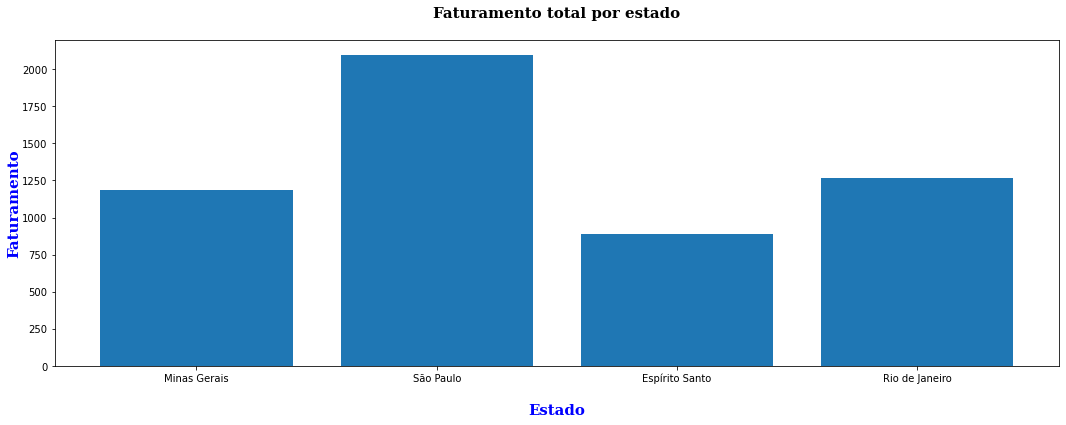

In [28]:
Estados = df['Estado'].unique()
media = df['Valor_Venda'].sum()/len(df['Estado'].unique())
print(f"Média: {media}")
total_estados = list()
for estado in Estados:
    new_df = df[df['Estado'] == estado]
    total_estado = new_df['Valor_Venda'].sum()
    total_estados.append(total_estado)
    print(f"{estado}----{total_estado:.2f}")
print()
fig, ax = plt.subplots(figsize=(18,6))

plt.bar(Estados, total_estados)

#configuração e estilos do titulo
plt.title(f"Faturamento total por estado\n", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nEstado", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Faturamento", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()

#### Média de valor monetário de vendas por produto

Média: 452.88
DX101----246.49
CX102----99.54
BX101----211.12
AX103----584.08
BX102----440.21
DX103----214.42
CX101----181.90
AX102----713.18
DX102----703.19
BX103----1125.15
CX103----391.86
AX101----523.41



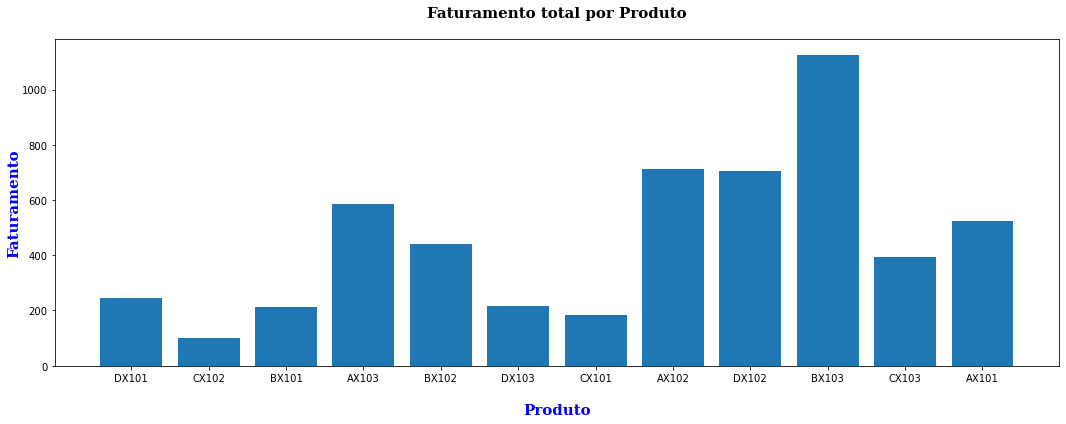

In [29]:
produtos = df['Produto'].unique()
media = df['Valor_Venda'].sum()/len(df['Produto'].unique())
print(f"Média: {media:.2f}")

total_produtos = list()
for produto in produtos:
    new_df = df[df['Produto'] == produto]
    total_produto = new_df['Valor_Venda'].sum()
    total_produtos.append(total_produto)
    print(f"{produto}----{total_produto:.2f}")
print()
fig, ax = plt.subplots(figsize=(18,6))

plt.bar(produtos, total_produtos)

#configuração e estilos do titulo
plt.title(f"Faturamento total por Produto\n", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nProduto", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Faturamento", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()

#### Total de unidades vendidas por estado e por dia

In [30]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(30, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


C:\Users\Markos Alves\AppData\Local\Temp\ipykernel_78900\3747470705.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df['Dia'] == dia]


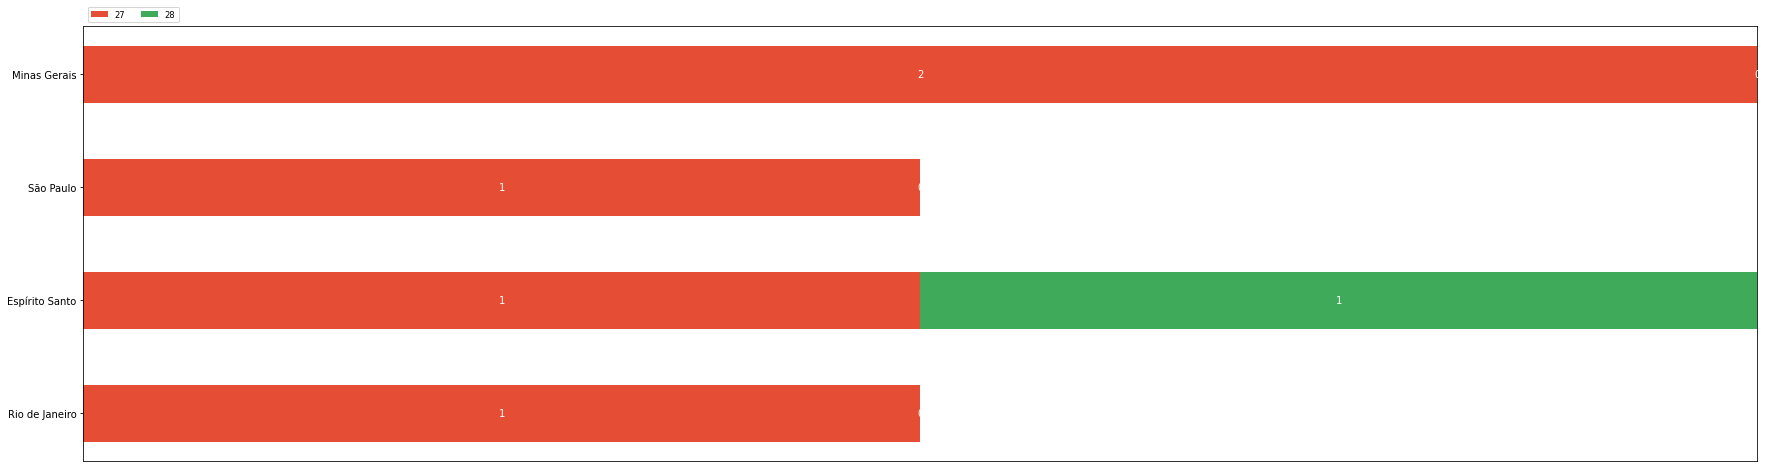

C:\Users\Markos Alves\AppData\Local\Temp\ipykernel_78900\3747470705.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df1[df['Dia'] == dia]


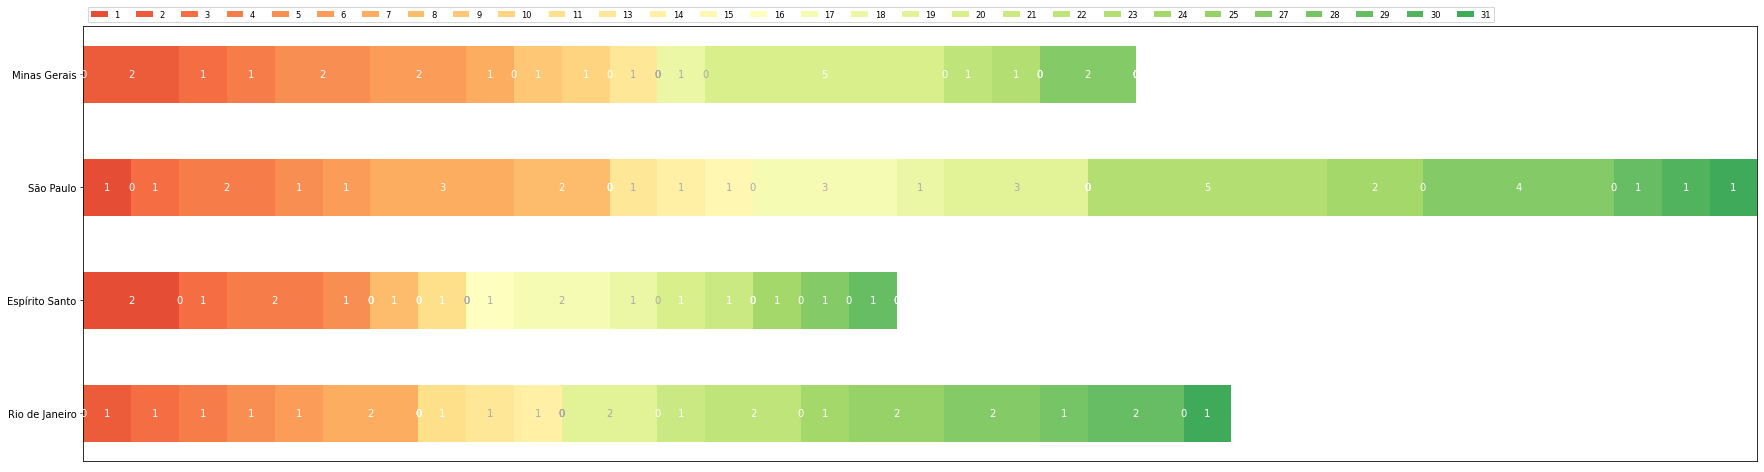

In [31]:
meses.sort()
for mes in meses: 
    df1 = df[df['Mês'] == mes]
    dias = df1['Dia'].unique()
    dias.sort()
    datas = {'Minas Gerais':[],
             'São Paulo':[],
             'Espírito Santo':[],
             'Rio de Janeiro':[]
             }
    for dia in dias:
        df2 = df1[df['Dia'] == dia]
        estados = df1['Estado'].unique()
        for estado in estados:
            df3 = df2[df2['Estado'] == estado]
            datas[estado].append(df3.shape[0])
    
    survey(datas, dias)
    plt.show()



#### Total de unidades vendidas por produto

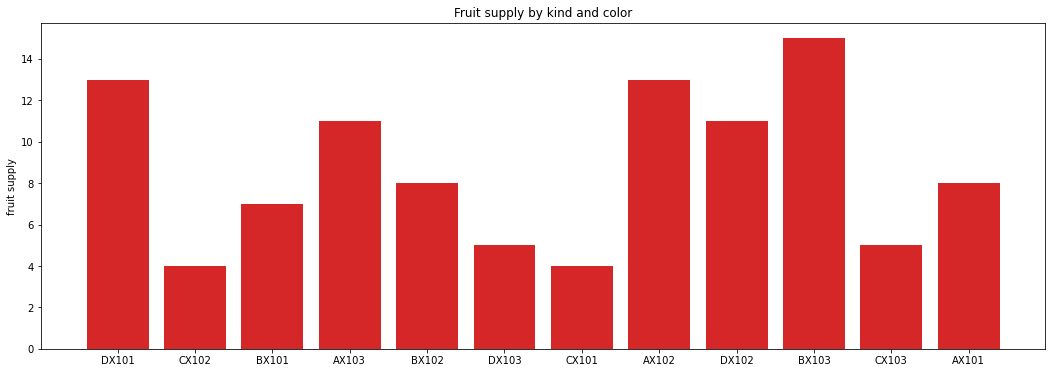

In [32]:
produtos = df['Produto'].unique()
U_vendidas = list()

for produto in produtos:
    new_df = df[df['Produto'] == produto]
    U_vendidas.append(new_df.shape[0])
    
novo_df = pd.DataFrame({'Produto': produtos, 'Quatidade': U_vendidas})

novo_df = novo_df.to_csv(f"E:\Dados_do_power_BI\cap_08\contxproduto.csv")
fig, ax = plt.subplots(figsize = (18, 6))



bar_colors = ['tab:red']

ax.bar(produtos, U_vendidas, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')


plt.show()

In [33]:
colunas = ['Produto','Cidade','Estado','País', 'Dia','Mês','Ano']

In [34]:
def cria_dim(df = pd.DataFrame(), colunas = list()):
    for coluna in colunas:
        df[coluna] = df[coluna].astype(str)
        dins = df[coluna].unique()
        new_dim = pd.DataFrame({coluna: dins})
        new_dim = new_dim.to_csv(f"E:\Dados_do_power_BI\cap_08\dim_{coluna}.csv")

In [35]:
cria_dim(df , colunas)

In [36]:
df = df.to_csv(f"E:\Dados_do_power_BI\cap_08\df_limpo.csv")